In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv(
    'datas/ml-1m/ratings.dat',
    header=None,
    names = ['UserId', 'MovieId', 'Rating', 'TimeStamp'],
    sep='::',
    engine='python'
)

In [4]:
df.shape

(1000209, 4)

In [5]:
df.head()

,UserId,MovieId,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df['pDate'] = pd.to_datetime(df['TimeStamp'], unit='s')

In [10]:
df.head()

,UserId,MovieId,Rating,TimeStamp,pData,pDate
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11,2001-01-06 23:38:11


In [20]:
df_group = df.groupby([df['pDate'].dt.month, "Rating"])['UserId'].agg(np.sum)

In [23]:
df_group.head(10)

pDate  Rating
1      1          2613452
       2          5294359
       3         12273331
       4         16452340
       5          9580889
2      1          1608795
       2          3747792
       3          8608216
       4         10941690
       5          5819374
Name: UserId, dtype: int64

In [24]:
df_group.columns = ['pDate', 'Rating', 'pv']

In [26]:
type(df_group)

pandas.core.series.Series

In [27]:
df_stack = df_group.unstack()

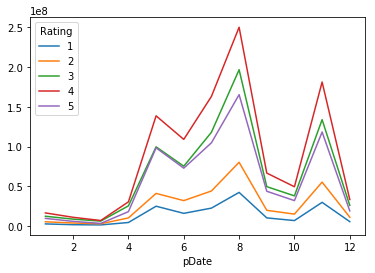

In [28]:
df_stack.plot()

In [31]:
df_stack

Rating,1,2,3,4,5
pDate,,,,,
1,2613452,5294359,12273331,16452340,9580889
2,1608795,3747792,8608216,10941690,5819374
3,1344378,2772172,6156512,6911661,3228406
4,4397883,10147641,25330546,30406281,18070625
5,24893943,41021601,99671422,138699142,98385825
6,15896973,31940801,75297592,109067096,72816021
7,22506252,44079974,118016191,163188814,104777329
8,42290096,80215303,196812819,250299153,165391463
9,10185866,19751997,49514561,66638484,43733790


In [34]:
df_stack.stack().head(10)

pDate  Rating
1      1          2613452
       2          5294359
       3         12273331
       4         16452340
       5          9580889
2      1          1608795
       2          3747792
       3          8608216
       4         10941690
       5          5819374
dtype: int64

In [33]:
df_group.head(10)

pDate  Rating
1      1          2613452
       2          5294359
       3         12273331
       4         16452340
       5          9580889
2      1          1608795
       2          3747792
       3          8608216
       4         10941690
       5          5819374
Name: UserId, dtype: int64

In [35]:
df_reset = df_group.reset_index()

In [36]:
df_reset.head()

,pDate,Rating,UserId
0,1,1,2613452
1,1,2,5294359
2,1,3,12273331
3,1,4,16452340
4,1,5,9580889


In [38]:
df_pivit = df_reset.pivot("pDate", 'Rating', 'UserId')

In [39]:
df_pivit.head()

Rating,1,2,3,4,5
pDate,,,,,
1,2613452,5294359,12273331,16452340,9580889
2,1608795,3747792,8608216,10941690,5819374
3,1344378,2772172,6156512,6911661,3228406
4,4397883,10147641,25330546,30406281,18070625
5,24893943,41021601,99671422,138699142,98385825


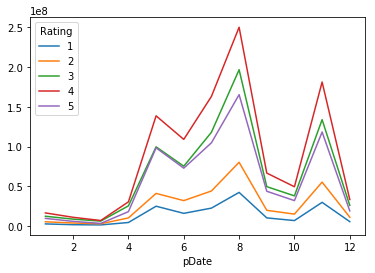

In [40]:
df_pivit.plot()